<a href="https://colab.research.google.com/github/Noob919/ResearchProject/blob/main/Concept%201/Concept1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data  = pd.read_csv("/content/drive/MyDrive/DataResearch/Dataset-Unicauca-Version2-87Atts.csv")

In [3]:
cols = ['Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
       'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count',
       'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.Flag.Count', 'ACK.Flag.Count',
       'URG.Flag.Count', 'CWE.Flag.Count', 'ECE.Flag.Count', 'Down.Up.Ratio',
       'Average.Packet.Size', 'Avg.Fwd.Segment.Size', 'Avg.Bwd.Segment.Size',
       'Fwd.Header.Length.1', 'Fwd.Avg.Bytes.Bulk', 'Fwd.Avg.Packets.Bulk',
       'Fwd.Avg.Bulk.Rate', 'Bwd.Avg.Bytes.Bulk', 'Bwd.Avg.Packets.Bulk',
       'Bwd.Avg.Bulk.Rate', 'Subflow.Fwd.Packets', 'Subflow.Fwd.Bytes',
       'Subflow.Bwd.Packets', 'Subflow.Bwd.Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active.Mean', 'Active.Std', 'Active.Max', 'Active.Min', 'Idle.Mean',
       'Idle.Std', 'Idle.Max', 'Idle.Min', 'L7Protocol',
       'ProtocolName']

For IoT1 Protocols will be: HTTP_Proxy, HTTP, SSL, Google(For both IoT1 and IoT2), Youtube

In [4]:
list_of_protocols = ["HTTP", "HTTP_PROXY", "SSL", "GOOGLE", "YOUTUBE"]
iot1df = data[data['ProtocolName'].isin(list_of_protocols)][cols]

In [5]:
iot1df.shape

(2841718, 79)

In [6]:
iot1df['ProtocolName'].value_counts()

GOOGLE        959110
HTTP          683734
HTTP_PROXY    623210
SSL           404883
YOUTUBE       170781
Name: ProtocolName, dtype: int64

In [20]:
iot1 = iot1df.groupby(['ProtocolName']).head(500)

In [21]:
# Create a label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'ProtocolName' column
iot1['ProtocolName_encoded'] = label_encoder.fit_transform(iot1['ProtocolName'])

<ipython-input-21-ce544f9e0e17>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iot1['ProtocolName_encoded'] = label_encoder.fit_transform(iot1['ProtocolName'])


# **Feature Selection**

In [22]:
X = iot1.drop(['ProtocolName','ProtocolName_encoded'], axis=1)
y = iot1['ProtocolName_encoded']

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)

In [24]:
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)

In [25]:
sfs.fit(X, y)

SequentialFeatureSelector(estimator=KNeighborsClassifier(),
                          n_features_to_select=3)

In [26]:
sfs.get_feature_names_out()

array(['Fwd.PSH.Flags', 'Bwd.PSH.Flags', 'L7Protocol'], dtype=object)

In [27]:
dataframe_iot1 = pd.DataFrame(iot1[['Fwd.PSH.Flags','Bwd.PSH.Flags', 'L7Protocol','Total.Fwd.Packets','ProtocolName_encoded']])

In [28]:
dataframe_iot1.head()

,Fwd.PSH.Flags,Bwd.PSH.Flags,L7Protocol,Total.Fwd.Packets,ProtocolName_encoded
0,0,0,131,22,2
1,0,0,131,2,2
2,1,0,7,3,1
3,0,0,7,1,1
4,1,0,131,5,2


#**Empty dataframe for store the data**

In [29]:
generated_dataframe = pd.DataFrame()

# **Fwd.PSH.Flags**

In [30]:
dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 0]['Fwd.PSH.Flags']

9       0
19      0
20      1
24      0
102     0
       ..
3485    0
3491    0
3495    0
3496    0
3503    0
Name: Fwd.PSH.Flags, Length: 500, dtype: int64

<Axes: xlabel='Fwd.PSH.Flags', ylabel='count'>

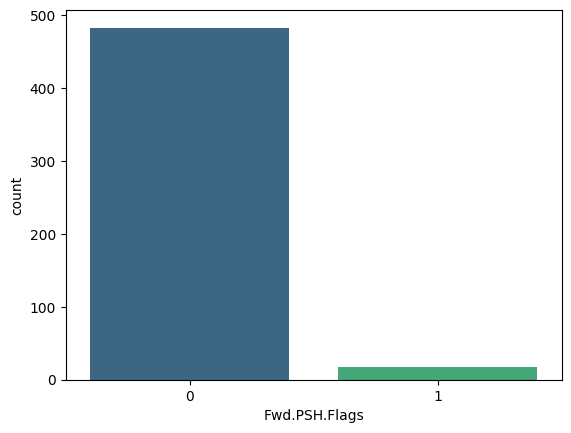

In [31]:
sns.countplot(x=dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 0]['Fwd.PSH.Flags'],palette='viridis')

In [32]:
#Calculate counts of each category
counts = dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 0]['Fwd.PSH.Flags'].value_counts()
counts

0    483
1     17
Name: Fwd.PSH.Flags, dtype: int64

In [33]:
# Normalize counts to obtain probabilities using scikit-learn
normalized_probabilities = normalize([counts.values], norm='l1')

In [34]:
normalized_probabilities

array([[0.966, 0.034]])

In [36]:
# Sample data
categories = [0,1]
probabilities = [0.966, 0.034]

# Generate categorical values based on probabilities
num_samples = 600
generated_values = np.random.choice(categories, size=num_samples, p=probabilities)

In [37]:
generated_dataframe['Fwd.PSH.Flags'] = generated_values

In [39]:
generated_dataframe['ProtocolName_encoded'] = np.zeros(600,dtype=int)
generated_dataframe['Bwd.PSH.Flags'] = np.zeros(600,dtype=int)
generated_dataframe['L7Protocol'] = 126

In [40]:
generated_dataframe

,Fwd.PSH.Flags,ProtocolName_encoded,Bwd.PSH.Flags,L7Protocol
0,0,0,0,126
1,0,0,0,126
2,0,0,0,126
3,0,0,0,126
4,0,0,0,126
...,...,...,...,...
595,0,0,0,126
596,0,0,0,126
597,0,0,0,126
598,0,0,0,126


<Axes: ylabel='count'>

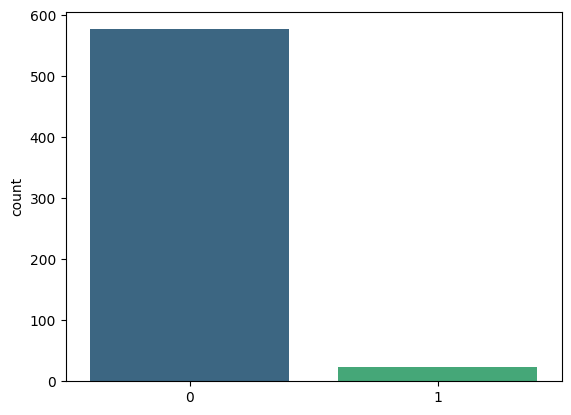

In [41]:
# Create a count plot (bar graph) using Seaborn
sns.countplot(x=generated_values, palette='viridis')

# **Total.Fwd.Packets**

In [ ]:
!pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions

In [43]:
dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 0]['Total.Fwd.Packets'].value_counts()

7      53
3      49
1      38
9      34
13     24
       ..
839     1
75      1
40      1
32      1
112     1
Name: Total.Fwd.Packets, Length: 67, dtype: int64

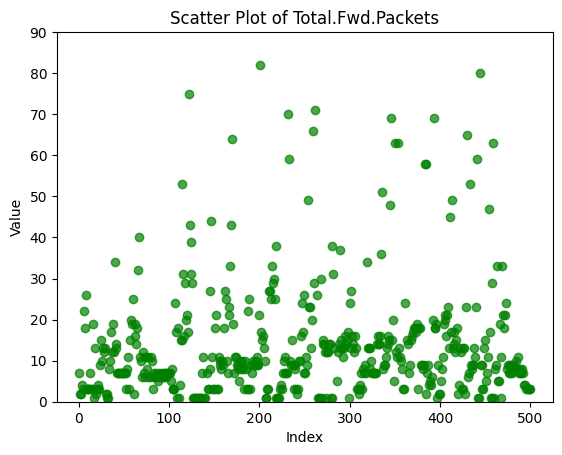

In [44]:
# Generate x values (e.g., indices)
x_values = np.arange(1, len(dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 0]['Total.Fwd.Packets'])+1)

# Plot a scatter plot of the generated data
plt.scatter(x_values, dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 0]['Total.Fwd.Packets'], color='green', alpha=0.7)
plt.title('Scatter Plot of Total.Fwd.Packets')
plt.ylim(0,90)
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

(0.0, 100.0)

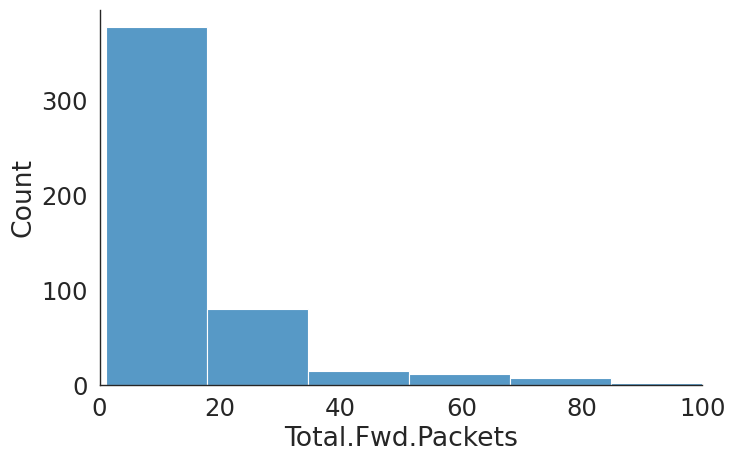

In [45]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=dataframe_iot1, x=dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 0]['Total.Fwd.Packets'], kind="hist", bins = 50, aspect =1.5)
plt.xlim(0,100)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intgrl = integrate.quad(llc, x0, x1,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  intgrl = integrate.quad(llc, x0, x1,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
kappa3,0.0000091729687096,2375.2039926214279149,2387.8478169166946827,inf,0.1004432032076550,0.0000762813182794
foldcauchy,0.0000152743154070,2025.2243748579994644,2037.8681991532660049,inf,0.1013342626892501,0.0000636432625939
wald,0.0000308215546029,3819.3661549291382471,3827.7953711259824559,inf,0.0867253099725244,0.0010124944024567
gibrat,0.0000395105611490,2627.8178654506655221,2636.2470816475097308,inf,0.1156986208873731,0.0000027481641529
mielke,0.0000492469772514,2484.8280430405829975,2501.6864754342718697,inf,0.2049915013382306,0.0000000000000000


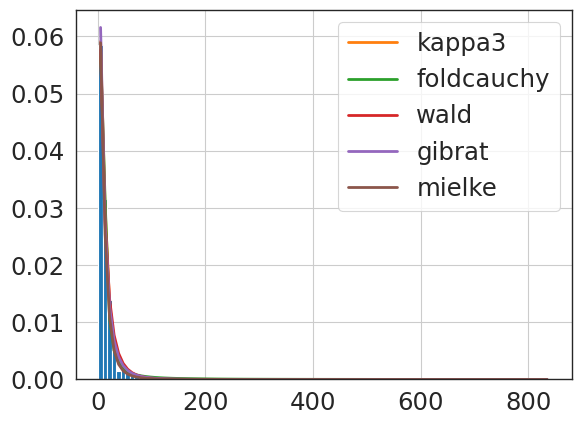

In [46]:
f = Fitter(dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 0]['Total.Fwd.Packets'],
           distributions= get_distributions())
f.fit()
pd.options.display.float_format = '{:.16f}'.format
f.summary()

In [47]:
f.get_best(method = 'sumsquare_error')

{'kappa3': {'a': 2.0010414653292097,
  'loc': 0.9999999995228365,
  'scale': 10.705391760440378}}

In [49]:
from scipy.stats import kappa3
import numpy as np

data = []
# Set the parameters for the kappa3 distribution
a = 2.0010414653292097  # shape parameter
loc = 0.9999999995228365
scale = 10.705391760440378

while len(data) < 600:
    value = np.round(kappa3.rvs(a, loc=loc, scale=scale))

    # Assuming dataframe_iot1 is a DataFrame containing your data
    min_value = dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 0]['Total.Fwd.Packets'].min()
    max_value = dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 0]['Total.Fwd.Packets'].max()

    if min_value <= value <= max_value:
        data.append(value)

# Print the generated data
print(data)

[3.0, 6.0, 36.0, 3.0, 20.0, 4.0, 4.0, 56.0, 19.0, 11.0, 2.0, 22.0, 3.0, 4.0, 5.0, 2.0, 1.0, 38.0, 4.0, 3.0, 4.0, 6.0, 39.0, 20.0, 11.0, 41.0, 6.0, 2.0, 24.0, 7.0, 9.0, 14.0, 24.0, 7.0, 17.0, 24.0, 2.0, 1.0, 7.0, 3.0, 3.0, 8.0, 31.0, 13.0, 9.0, 8.0, 7.0, 5.0, 21.0, 134.0, 4.0, 4.0, 2.0, 24.0, 17.0, 27.0, 13.0, 6.0, 6.0, 5.0, 15.0, 19.0, 42.0, 3.0, 15.0, 14.0, 9.0, 2.0, 5.0, 17.0, 14.0, 11.0, 34.0, 6.0, 14.0, 5.0, 2.0, 5.0, 5.0, 6.0, 70.0, 35.0, 25.0, 52.0, 2.0, 6.0, 17.0, 6.0, 28.0, 5.0, 16.0, 55.0, 22.0, 9.0, 16.0, 4.0, 3.0, 11.0, 9.0, 23.0, 17.0, 13.0, 3.0, 1.0, 30.0, 16.0, 10.0, 9.0, 87.0, 9.0, 7.0, 2.0, 4.0, 7.0, 8.0, 3.0, 13.0, 5.0, 5.0, 11.0, 100.0, 14.0, 34.0, 10.0, 8.0, 26.0, 12.0, 7.0, 8.0, 31.0, 19.0, 5.0, 63.0, 5.0, 11.0, 15.0, 51.0, 28.0, 8.0, 4.0, 24.0, 6.0, 19.0, 13.0, 1.0, 8.0, 16.0, 11.0, 5.0, 15.0, 2.0, 11.0, 6.0, 2.0, 10.0, 35.0, 23.0, 31.0, 2.0, 1.0, 9.0, 9.0, 17.0, 9.0, 5.0, 6.0, 7.0, 4.0, 7.0, 38.0, 2.0, 25.0, 7.0, 16.0, 21.0, 7.0, 1.0, 39.0, 20.0, 12.0, 8.0, 14.0, 

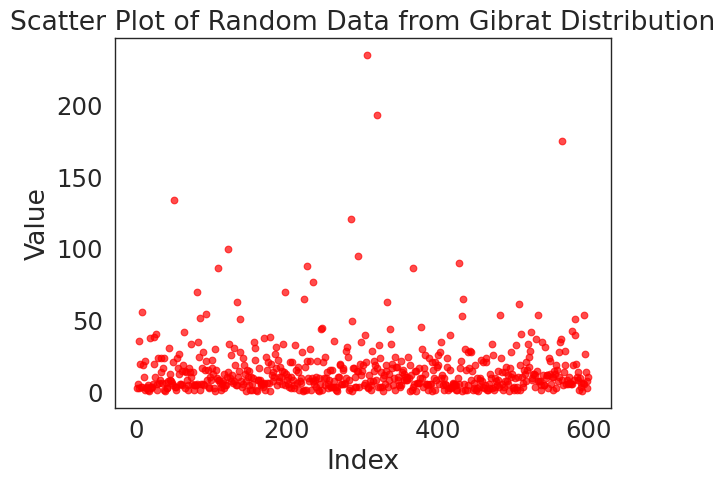

In [50]:
x_values = np.arange(1, len(data)+1)
# Plot a scatter plot of the generated data
plt.scatter(x_values, data, color='red', alpha=0.7)
plt.title('Scatter Plot of Random Data from Gibrat Distribution')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

In [51]:
generated_dataframe['Total.Fwd.Packets'] = data

ValueError: ignored

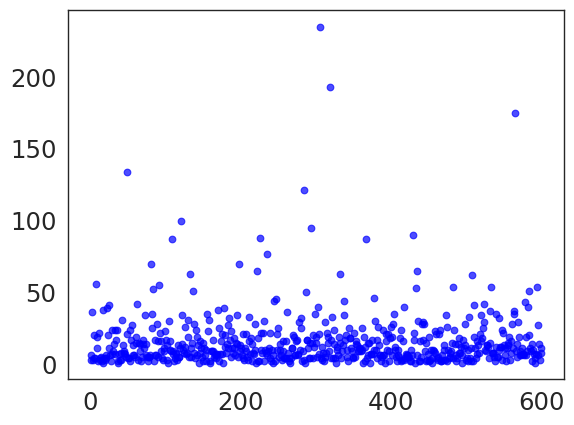

In [52]:
# Plot a scatter plot of the two columns with different colors
plt.scatter(x_values, data, color='blue', label='Generated Data', alpha=0.7)
plt.scatter(x_values, dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 0]['Total.Fwd.Packets'], color='green', alpha=0.7, label = 'Orignal Data')

plt.title('Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(fontsize='small')
plt.show()

In [53]:
generated_dataframe

,Fwd.PSH.Flags,ProtocolName_encoded,Bwd.PSH.Flags,L7Protocol,Total.Fwd.Packets
0,0,0,0,126,3.0000000000000000
1,0,0,0,126,6.0000000000000000
2,0,0,0,126,36.0000000000000000
3,0,0,0,126,3.0000000000000000
4,0,0,0,126,20.0000000000000000
...,...,...,...,...,...
595,0,0,0,126,27.0000000000000000
596,0,0,0,126,14.0000000000000000
597,0,0,0,126,3.0000000000000000
598,0,0,0,126,8.0000000000000000


# For Second Protocol

Empty DataFrame

In [54]:
generated_dataframe1 = pd.DataFrame()

**Fwd.PSH.Flags**

<Axes: xlabel='Fwd.PSH.Flags', ylabel='count'>

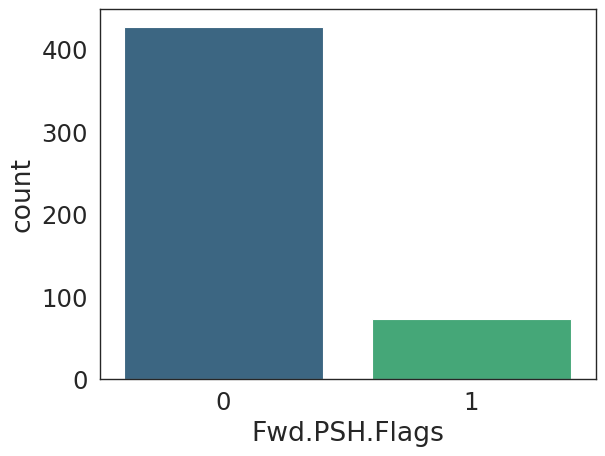

In [55]:
dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 1]['Fwd.PSH.Flags']
sns.countplot(x=dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 1]['Fwd.PSH.Flags'],palette='viridis')

In [56]:
counts = dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 1]['Fwd.PSH.Flags'].value_counts()
print(counts)
# Normalize counts to obtain probabilities using scikit-learn
normalized_probabilities = normalize([counts.values], norm='l1')
print(normalized_probabilities)

0    427
1     73
Name: Fwd.PSH.Flags, dtype: int64
[[0.854 0.146]]


In [58]:
# Sample data
categories = [0,1]
probabilities = [0.854, 0.146]

# Generate categorical values based on probabilities
num_samples = 600
generated_values = np.random.choice(categories, size=num_samples, p=probabilities)

In [59]:
generated_dataframe1['Fwd.PSH.Flags'] = generated_values

<Axes: ylabel='count'>

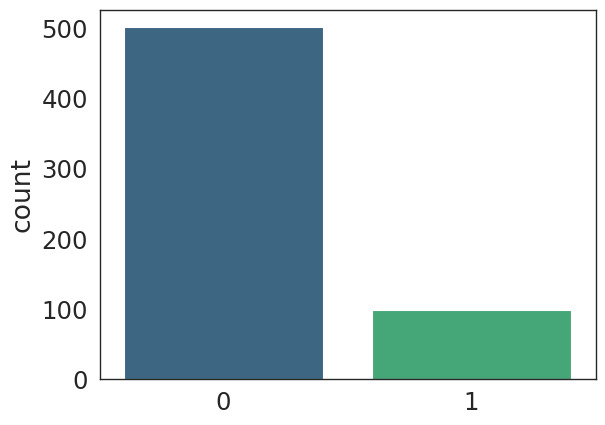

In [60]:
# Create a count plot (bar graph) using Seaborn
sns.countplot(x=generated_values, palette='viridis')

In [61]:
dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 1]['Bwd.PSH.Flags'].value_counts()

0    500
Name: Bwd.PSH.Flags, dtype: int64

In [62]:
generated_dataframe1['Bwd.PSH.Flags'] = 0

In [63]:
dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 1]['L7Protocol'].value_counts()

7    500
Name: L7Protocol, dtype: int64

In [64]:
generated_dataframe1['L7Protocol'] = 7

**Total.Fwd.Packets**

In [65]:
dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 1]['Total.Fwd.Packets'].value_counts()

2      303
3       69
4       22
1       21
5       17
6       15
9        5
7        4
26       2
12       2
8        2
28       2
29       2
36       2
11       2
34       2
10       2
23       1
55       1
251      1
396      1
13       1
47       1
400      1
38       1
481      1
31       1
42       1
128      1
60       1
561      1
451      1
64       1
403      1
41       1
19       1
588      1
139      1
240      1
510      1
242      1
356      1
49       1
Name: Total.Fwd.Packets, dtype: int64

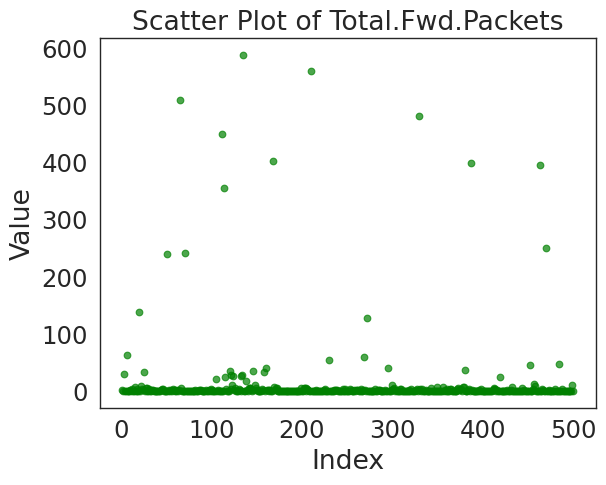

In [66]:
# Generate x values (e.g., indices)
x_values = np.arange(1, len(dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 1]['Total.Fwd.Packets'])+1)

# Plot a scatter plot of the generated data
plt.scatter(x_values, dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 1]['Total.Fwd.Packets'], color='green', alpha=0.7)
plt.title('Scatter Plot of Total.Fwd.Packets')

plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

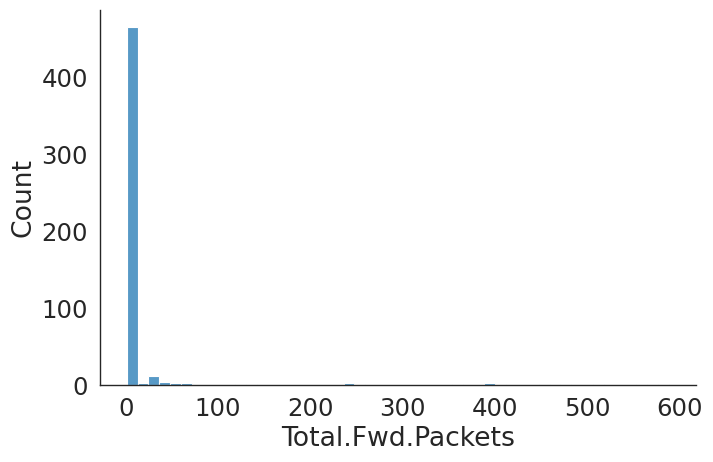

In [67]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=dataframe_iot1, x=dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 1]['Total.Fwd.Packets'], kind="hist", bins = 50, aspect =1.5)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intgrl = integrate.quad(llc, x0, x1,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  intgrl = integrate.quad(llc, x0, x1,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3754: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intgrl = (integrate.quad(llc, x0, mean,
/usr/local/lib/python3.10/d

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gibrat,0.0014583745062848,3592.4163500850108903,3600.8455662818550991,inf,0.3417108454544300,0.0000000000000000
nct,0.0017128354462332,2531.2249083281467392,2548.0833407218356115,inf,0.3464962086322962,0.0000000000000000
ncf,0.0019747363168235,2641.9092478930597281,2662.9822883851707047,inf,0.3286887981148919,0.0000000000000000
mielke,0.0026643130814999,2514.5168551172919251,2531.3752875109807974,inf,0.3132811625457212,0.0000000000000000
fisk,0.0027421893209771,2618.6128107247509433,2631.2566350200177112,inf,0.3219599788348041,0.0000000000000000


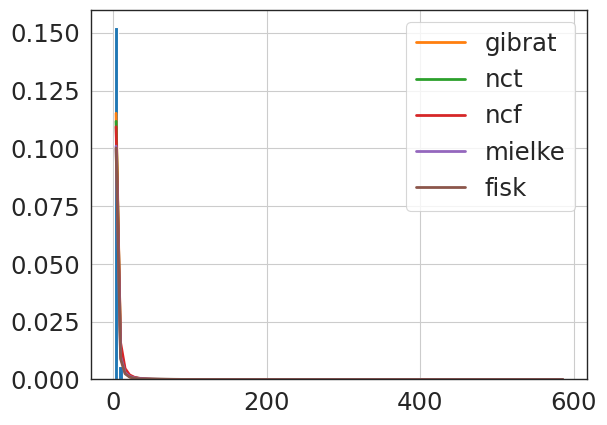

In [68]:
f = Fitter(dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 1]['Total.Fwd.Packets'],
           distributions= get_distributions())
f.fit()
pd.options.display.float_format = '{:.16f}'.format
f.summary()

In [69]:
f.get_best(method = 'sumsquare_error')

{'gibrat': {'loc': 0.8404731364763225, 'scale': 1.9240042804560813}}

In [70]:
from scipy.stats import gibrat

data = []
while len(data) < 600:
    value = np.round(gibrat.rvs(loc = 0.8404731364763225, scale =  1.9240042804560813))
    if dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 1]['Total.Fwd.Packets'].min() <= value <= dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 1]['Total.Fwd.Packets'].max():
        data.append(value)

In [71]:
generated_dataframe1['Total.Fwd.Packets'] = data

In [72]:
generated_dataframe1['ProtocolName_encoded'] = 1

# Third Protocol

In [73]:
generated_dataframe2 = pd.DataFrame()

0    462
1     38
Name: Fwd.PSH.Flags, dtype: int64


<Axes: xlabel='Fwd.PSH.Flags', ylabel='count'>

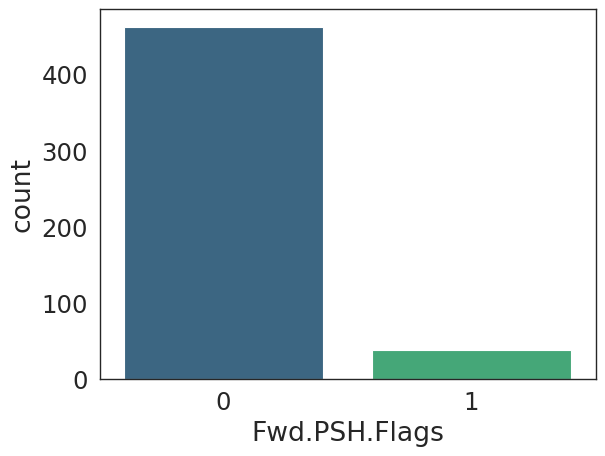

In [74]:
print(dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 2]['Fwd.PSH.Flags'].value_counts())
sns.countplot(x=dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 2]['Fwd.PSH.Flags'],palette='viridis')

In [75]:
counts = dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 2]['Fwd.PSH.Flags'].value_counts()
print(counts)
# Normalize counts to obtain probabilities using scikit-learn
normalized_probabilities = normalize([counts.values], norm='l1')
print(normalized_probabilities)

0    462
1     38
Name: Fwd.PSH.Flags, dtype: int64
[[0.924 0.076]]


In [76]:
# Sample data
categories = [0,1]
probabilities = [0.924, 0.076]

# Generate categorical values based on probabilities
num_samples = 600
generated_values = np.random.choice(categories, size=num_samples, p=probabilities)

In [77]:
generated_dataframe2['Fwd.PSH.Flags'] = generated_values

In [78]:
dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 2]['Bwd.PSH.Flags'].value_counts()

0    500
Name: Bwd.PSH.Flags, dtype: int64

In [79]:
generated_dataframe2['Bwd.PSH.Flags'] = 0

In [80]:
dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 2]['L7Protocol'].value_counts()

131    500
Name: L7Protocol, dtype: int64

In [81]:
generated_dataframe2['L7Protocol'] = 131

**Total.Fwd.Packets**

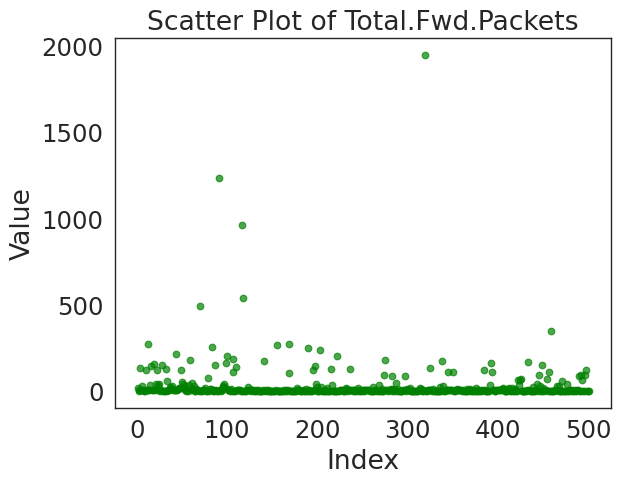

In [82]:
# Generate x values (e.g., indices)
x_values = np.arange(1, len(dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 2]['Total.Fwd.Packets'])+1)

# Plot a scatter plot of the generated data
plt.scatter(x_values, dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 2]['Total.Fwd.Packets'], color='green', alpha=0.7)
plt.title('Scatter Plot of Total.Fwd.Packets')

plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

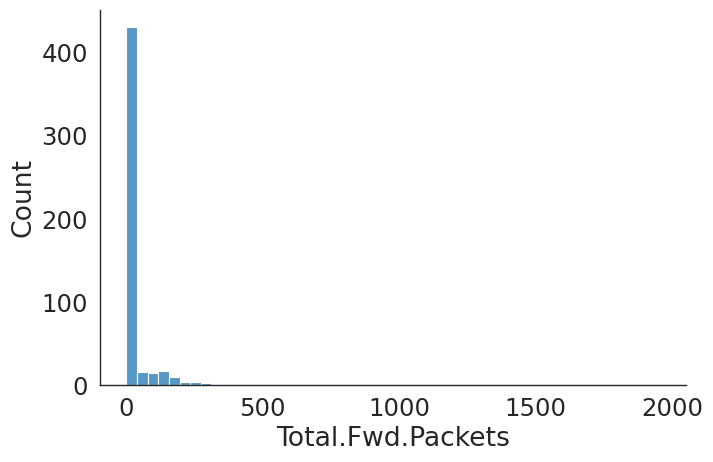

In [83]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=dataframe_iot1, x=dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 2]['Total.Fwd.Packets'], kind="hist", bins = 50, aspect =1.5)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intgrl = integrate.quad(llc, x0, x1,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  intgrl = integrate.quad(llc, x0, x1,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gibrat,0.0000451879064426,3689.2845272397862573,3697.7137434366304660,inf,0.2025688805925778,0.0000000000000000
wald,0.0001316336978887,5816.7935628451332377,5825.2227790419774465,inf,0.3275993662061882,0.0000000000000000
beta,0.0001554576060303,12172.5557163635912730,12189.4141487572796905,inf,0.1780364124408704,0.0000000000000246
rel_breitwigner,0.0002715789199557,2538.0713361839575555,2550.7151604792243234,inf,0.3174247591218420,0.0000000000000000
skewcauchy,0.0002919559297489,2440.6277376253287912,2453.2715619205955591,inf,0.1063823209563149,0.0000221254170847


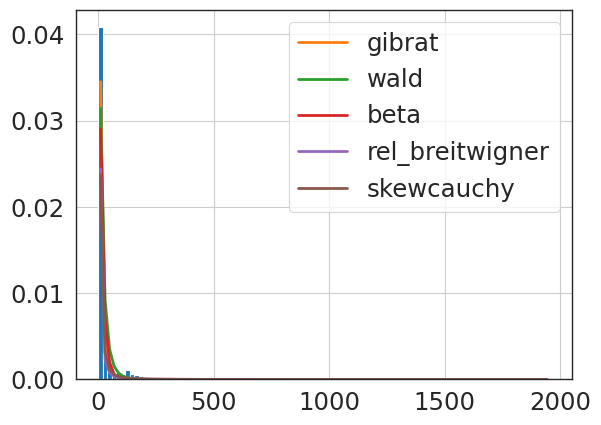

In [84]:
f = Fitter(dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 2]['Total.Fwd.Packets'],
           distributions= get_distributions())
f.fit()
pd.options.display.float_format = '{:.16f}'.format
f.summary()

In [85]:
f.get_best(method = 'sumsquare_error')

{'gibrat': {'loc': -0.046356316492649194, 'scale': 7.470274224835675}}

In [86]:
from scipy.stats import gibrat

data = []
while len(data) < 600:
    value = np.round(gibrat.rvs(loc = -0.046356316492649194, scale = 7.470274224835675))
    if dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 2]['Total.Fwd.Packets'].min() <= value <= dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 2]['Total.Fwd.Packets'].max():
        data.append(value)

In [87]:
generated_dataframe2['Total.Fwd.Packets'] = data

In [88]:
generated_dataframe2['ProtocolName_encoded'] = 2

# Fourth Protocol

In [89]:
generated_dataframe3 = pd.DataFrame()

0    432
1     68
Name: Fwd.PSH.Flags, dtype: int64


<Axes: xlabel='Fwd.PSH.Flags', ylabel='count'>

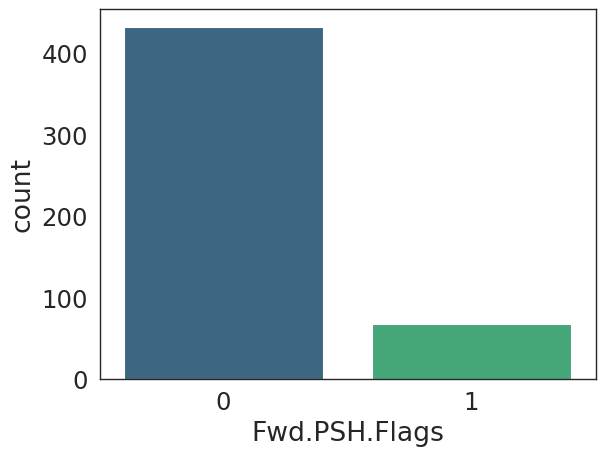

In [90]:
print(dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 3]['Fwd.PSH.Flags'].value_counts())
sns.countplot(x=dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 3]['Fwd.PSH.Flags'],palette='viridis')

In [91]:
counts = dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 3]['Fwd.PSH.Flags'].value_counts()
print(counts)
# Normalize counts to obtain probabilities using scikit-learn
normalized_probabilities = normalize([counts.values], norm='l1')
print(normalized_probabilities)

0    432
1     68
Name: Fwd.PSH.Flags, dtype: int64
[[0.864 0.136]]


In [92]:
# Sample data
categories = [0,1]
probabilities = [0.864, 0.136]

# Generate categorical values based on probabilities
num_samples = 600
generated_values = np.random.choice(categories, size=num_samples, p=probabilities)

In [93]:
generated_dataframe3['Fwd.PSH.Flags'] = generated_values

In [94]:
dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 3]['Bwd.PSH.Flags'].value_counts()

0    500
Name: Bwd.PSH.Flags, dtype: int64

In [95]:
generated_dataframe3['Bwd.PSH.Flags'] = 0

In [96]:
dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 3]['L7Protocol'].value_counts()

91    500
Name: L7Protocol, dtype: int64

In [97]:
generated_dataframe3['L7Protocol'] = 91

In [98]:
generated_dataframe3['ProtocolName_encoded'] = 3

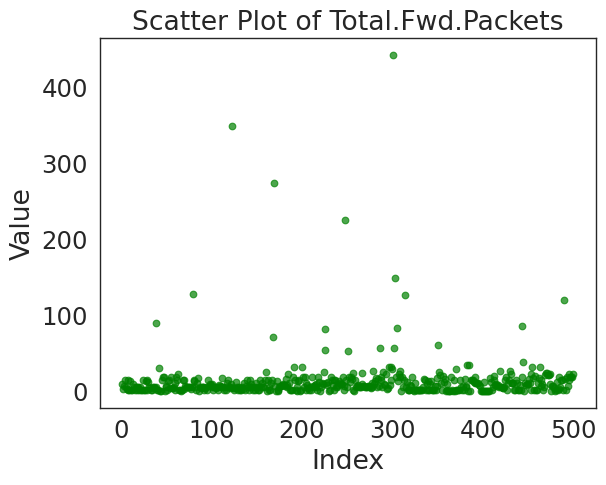

In [99]:
# Generate x values (e.g., indices)
x_values = np.arange(1, len(dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 3]['Total.Fwd.Packets'])+1)

# Plot a scatter plot of the generated data
plt.scatter(x_values, dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 3]['Total.Fwd.Packets'], color='green', alpha=0.7)
plt.title('Scatter Plot of Total.Fwd.Packets')

plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

**Total.Fwd.Packets**

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intgrl = integrate.quad(llc, x0, x1,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3754: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intgrl = (integrate.quad(llc, x0, mean,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:1950: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(self._pdf, _a, x, args=args)[0]
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improv

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
ncf,0.0001283962292714,2503.9910406641361078,2525.0640811562470844,inf,0.1427578956985459,0.0000000023553326
wald,0.0001954043497972,2891.9469905192045189,2900.3762067160487277,inf,0.1472024135612119,0.0000000006397134
kappa3,0.0002812762728322,2028.7131796417804708,2041.3570039370470113,inf,0.1541013581402935,0.0000000000780403
rel_breitwigner,0.0003229411029613,2524.7357991129974835,2537.3796234082642513,inf,0.1781049367433163,0.0000000000000240
exponnorm,0.0003372859246049,3860.7327199763872159,3873.3765442716539837,inf,0.1699502796027952,0.0000000000004281


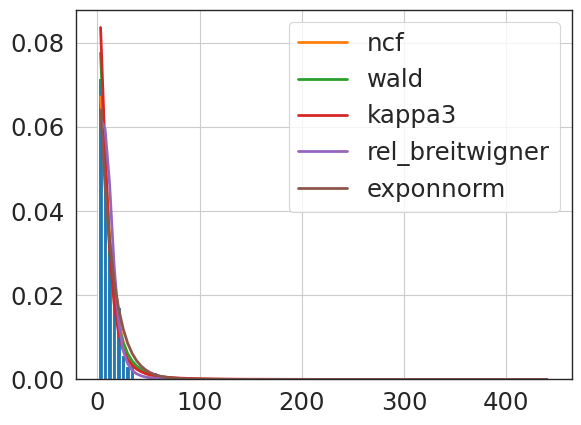

In [100]:
f = Fitter(dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 3]['Total.Fwd.Packets'],
           distributions= get_distributions())
f.fit()
pd.options.display.float_format = '{:.16f}'.format
f.summary()

In [101]:
f.get_best(method = 'sumsquare_error')

{'ncf': {'dfn': 0.9388949669095099,
  'dfd': 9.724939471917226,
  'nc': 4.140450109999739,
  'loc': 0.9999999999999999,
  'scale': 1.6601351700506366}}

In [ ]:
from scipy.stats import foldcauchy

data = []
while len(data) < 200:
    value = np.round(foldcauchy.rvs(c = 0.8697523889187618 ,loc = 0.9999999976454452, scale = 4.116436150467477))
    if dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 3]['Total.Fwd.Packets'].min() <= value <= dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 3]['Total.Fwd.Packets'].max():
        data.append(value)

In [102]:
from scipy.stats import ncf
import numpy as np

data = []
# Set the parameters for the ncf distribution
dfn = 0.9388949669095099  # Degrees of freedom in the numerator
dfd = 9.724939471917226  # Degrees of freedom in the denominator
nc = 4.140450109999739  # Non-centrality parameter
loc = 0.9999999999999999
scale = 1.6601351700506366

while len(data) < 600:
    value = np.round(ncf.rvs(dfn, dfd, nc, loc=loc, scale=scale))

    # Assuming dataframe_iot1 is a DataFrame containing your data
    min_value = dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 3]['Total.Fwd.Packets'].min()
    max_value = dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 3]['Total.Fwd.Packets'].max()

    if min_value <= value <= max_value:
        data.append(value)

# Print the generated data
print(data)


[18.0, 3.0, 9.0, 1.0, 33.0, 11.0, 5.0, 12.0, 22.0, 1.0, 14.0, 2.0, 2.0, 28.0, 4.0, 2.0, 4.0, 8.0, 11.0, 12.0, 5.0, 11.0, 21.0, 2.0, 5.0, 13.0, 10.0, 2.0, 1.0, 7.0, 10.0, 2.0, 7.0, 6.0, 1.0, 6.0, 6.0, 4.0, 4.0, 28.0, 3.0, 3.0, 2.0, 8.0, 3.0, 10.0, 14.0, 16.0, 2.0, 43.0, 3.0, 8.0, 11.0, 12.0, 11.0, 3.0, 7.0, 2.0, 12.0, 16.0, 13.0, 24.0, 2.0, 27.0, 6.0, 8.0, 5.0, 38.0, 3.0, 7.0, 4.0, 6.0, 18.0, 4.0, 1.0, 1.0, 20.0, 1.0, 2.0, 16.0, 16.0, 12.0, 1.0, 3.0, 6.0, 3.0, 5.0, 5.0, 19.0, 5.0, 27.0, 3.0, 5.0, 9.0, 19.0, 6.0, 3.0, 8.0, 15.0, 4.0, 8.0, 52.0, 9.0, 13.0, 15.0, 3.0, 15.0, 6.0, 18.0, 5.0, 16.0, 10.0, 8.0, 2.0, 10.0, 26.0, 4.0, 43.0, 3.0, 4.0, 8.0, 59.0, 11.0, 25.0, 10.0, 5.0, 8.0, 5.0, 10.0, 18.0, 13.0, 9.0, 3.0, 9.0, 6.0, 12.0, 9.0, 53.0, 8.0, 13.0, 15.0, 8.0, 17.0, 38.0, 39.0, 5.0, 9.0, 2.0, 2.0, 7.0, 1.0, 25.0, 3.0, 6.0, 7.0, 23.0, 9.0, 24.0, 2.0, 1.0, 1.0, 1.0, 24.0, 3.0, 1.0, 14.0, 24.0, 4.0, 2.0, 8.0, 3.0, 14.0, 15.0, 6.0, 10.0, 11.0, 48.0, 4.0, 1.0, 37.0, 13.0, 10.0, 25.0, 5.0, 11.

In [103]:
generated_dataframe3['Total.Fwd.Packets'] = data

# Fifth Protocol

In [104]:
generated_dataframe4 = pd.DataFrame()

0    499
1      1
Name: Fwd.PSH.Flags, dtype: int64


<Axes: xlabel='Fwd.PSH.Flags', ylabel='count'>

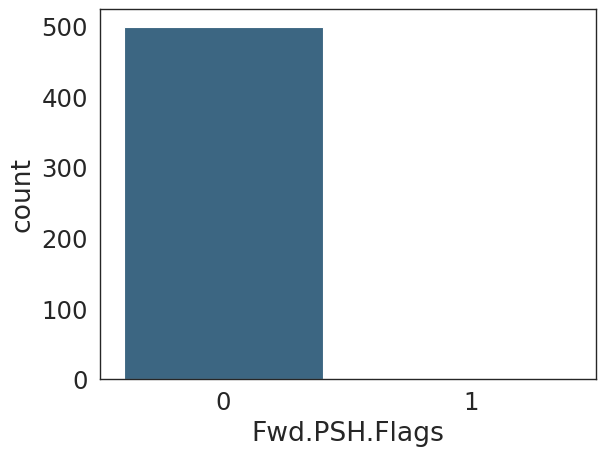

In [105]:
print(dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 4]['Fwd.PSH.Flags'].value_counts())
sns.countplot(x=dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 4]['Fwd.PSH.Flags'],palette='viridis')

In [106]:
counts = dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 4]['Fwd.PSH.Flags'].value_counts()
print(counts)
# Normalize counts to obtain probabilities using scikit-learn
normalized_probabilities = normalize([counts.values], norm='l1')
print(normalized_probabilities)

0    499
1      1
Name: Fwd.PSH.Flags, dtype: int64
[[0.998 0.002]]


In [107]:
# Sample data
categories = [0,1]
probabilities = [0.998, 0.002]

# Generate categorical values based on probabilities
num_samples = 600
generated_values = np.random.choice(categories, size=num_samples, p=probabilities)

In [108]:
generated_dataframe4['Fwd.PSH.Flags'] = generated_values

In [109]:
dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 4]['Bwd.PSH.Flags'].value_counts()

0    500
Name: Bwd.PSH.Flags, dtype: int64

In [110]:
generated_dataframe4['Bwd.PSH.Flags'] = 0

In [111]:
dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 4]['L7Protocol'].value_counts()

124    500
Name: L7Protocol, dtype: int64

In [112]:
generated_dataframe4['L7Protocol'] = 124

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intgrl = integrate.quad(llc, x0, x1,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  intgrl = integrate.quad(llc, x0, x1,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,0.0000113084515573,2343.7677768686253330,2352.1969930654695418,inf,0.1662150514995754,0.0000000000015300
burr12,0.0000146005610844,2074.7647455499327407,2091.6231779436216129,inf,0.1087672725551047,0.0000131914057378
alpha,0.0000168613950120,2097.4932339040733495,2110.1370581993401174,inf,0.1128028428686427,0.0000053556820774
nct,0.0000177753350603,2082.6710760596533873,2099.5295084533422596,inf,0.1065770707114096,0.0000212196962440
t,0.0000193514406516,2171.3917346254843324,2184.0355589207511002,inf,0.1765018536025288,0.0000000000000427


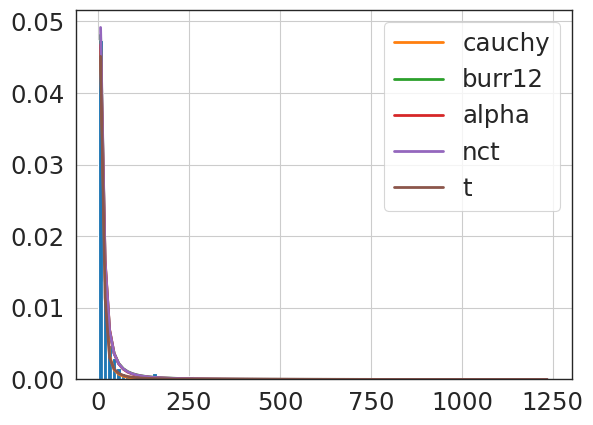

In [113]:
f = Fitter(dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 4]['Total.Fwd.Packets'],
           distributions= get_distributions())
f.fit()
pd.options.display.float_format = '{:.16f}'.format
f.summary()

In [114]:
f.get_best(method = 'sumsquare_error')

{'cauchy': {'loc': 10.248483043884182, 'scale': 5.077293548292255}}

In [115]:
from scipy.stats import cauchy

data = []
while len(data) < 600:
    value = np.round(cauchy.rvs(loc = 10.248483043884182, scale = 5.077293548292255))
    if dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 4]['Total.Fwd.Packets'].min() <= value <= dataframe_iot1[dataframe_iot1['ProtocolName_encoded'] == 4]['Total.Fwd.Packets'].max():
        data.append(value)

In [116]:
generated_dataframe4['Total.Fwd.Packets'] =  data

In [117]:
generated_dataframe4['ProtocolName_encoded'] = 4

# Combine DataFrame

In [118]:
test_df = pd.concat([generated_dataframe,generated_dataframe1,generated_dataframe2,generated_dataframe3,generated_dataframe4], ignore_index=True)

In [119]:
test_df

,Fwd.PSH.Flags,ProtocolName_encoded,Bwd.PSH.Flags,L7Protocol,Total.Fwd.Packets
0,0,0,0,126,3.0000000000000000
1,0,0,0,126,6.0000000000000000
2,0,0,0,126,36.0000000000000000
3,0,0,0,126,3.0000000000000000
4,0,0,0,126,20.0000000000000000
...,...,...,...,...,...
2995,0,4,0,124,16.0000000000000000
2996,0,4,0,124,21.0000000000000000
2997,0,4,0,124,21.0000000000000000
2998,0,4,0,124,11.0000000000000000


# **Machine learning Classifier**
## Random Forest
---



In [120]:
# Features (X)
X = dataframe_iot1[['Fwd.PSH.Flags', 'Bwd.PSH.Flags', 'L7Protocol', 'Total.Fwd.Packets']]

# Target variable (y)
y = dataframe_iot1['ProtocolName_encoded']


# Initialize a RandomForestClassifier (you can choose another algorithm based on your requirements)
model = RandomForestClassifier(n_estimators= 10, random_state=42)

# Train the model
model.fit(X, y)

X_test = test_df[['Fwd.PSH.Flags', 'Bwd.PSH.Flags', 'L7Protocol', 'Total.Fwd.Packets']]
y_test = test_df['ProtocolName_encoded']
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report for more detailed evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       600
           1       1.00      1.00      1.00       600
           2       1.00      1.00      1.00       600
           3       1.00      1.00      1.00       600
           4       1.00      1.00      1.00       600

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



## Decision Tree

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Features (X)
X = dataframe_iot1[['Fwd.PSH.Flags', 'Bwd.PSH.Flags', 'L7Protocol', 'Total.Fwd.Packets']]

# Target variable (y)
y = dataframe_iot1['ProtocolName_encoded']

# Initialize a DecisionTreeClassifier (you can choose another algorithm based on your requirements)
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X, y)

# Test set
X_test = test_df[['Fwd.PSH.Flags', 'Bwd.PSH.Flags', 'L7Protocol', 'Total.Fwd.Packets']]
y_test = test_df['ProtocolName_encoded']

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report for more detailed evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       600
           1       1.00      1.00      1.00       600
           2       1.00      1.00      1.00       600
           3       1.00      1.00      1.00       600
           4       1.00      1.00      1.00       600

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



##SVC

In [123]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Features (X)
X = dataframe_iot1[['Fwd.PSH.Flags', 'Bwd.PSH.Flags', 'L7Protocol', 'Total.Fwd.Packets']]

# Target variable (y)
y = dataframe_iot1['ProtocolName_encoded']

# Initialize a Support Vector Machine (SVM) classifier
model = SVC(random_state=42)

# Train the model
model.fit(X, y)

# Test set
X_test = test_df[['Fwd.PSH.Flags', 'Bwd.PSH.Flags', 'L7Protocol', 'Total.Fwd.Packets']]
y_test = test_df['ProtocolName_encoded']

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report for more detailed evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.97      0.66       600
           1       1.00      1.00      1.00       600
           2       0.99      1.00      0.99       600
           3       1.00      1.00      1.00       600
           4       0.60      0.04      0.07       600

    accuracy                           0.80      3000
   macro avg       0.82      0.80      0.74      3000
weighted avg       0.82      0.80      0.74      3000



In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Features (X)
X = dataframe_iot1[['Fwd.PSH.Flags', 'Bwd.PSH.Flags', 'L7Protocol', 'Total.Fwd.Packets']]

# Target variable (y)
y = dataframe_iot1['ProtocolName_encoded']

# Initialize a Logistic Regression classifier
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X, y)

# Test set
X_test = test_df[['Fwd.PSH.Flags', 'Bwd.PSH.Flags', 'L7Protocol', 'Total.Fwd.Packets']]
y_test = test_df['ProtocolName_encoded']

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report for more detailed evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.80      0.62       600
           1       1.00      1.00      1.00       600
           2       0.96      1.00      0.98       600
           3       1.00      1.00      1.00       600
           4       0.55      0.20      0.29       600

    accuracy                           0.80      3000
   macro avg       0.80      0.80      0.78      3000
weighted avg       0.80      0.80      0.78      3000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Generation of Json**

In [ ]:
parameters = {
    'Google':
     {
    "Categorical" : {
        'name': 'Fwd.PSH.Flags',
        'Categories': [0,1],
        'Probabilities': [0.955, 0.045]
                    },
    'Continous': {
        'name': 'Total.Fwd.Packets',
        'param': {'gibrat': {'loc': -0.04832866533945217, 'scale': 7.79055343602746}}
                  }
    }
}